In [50]:
import numbers as  np
import  pandas as pd
import  sklearn
import  matplotlib.pyplot as plt
import  seaborn as sns
import  missingno as ms


### Data Reading

In [51]:

train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [52]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [53]:
test.shape

(18601, 11)

In [54]:
train.shape

(43400, 12)

### Data Cleaning

In [56]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [57]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<AxesSubplot:>

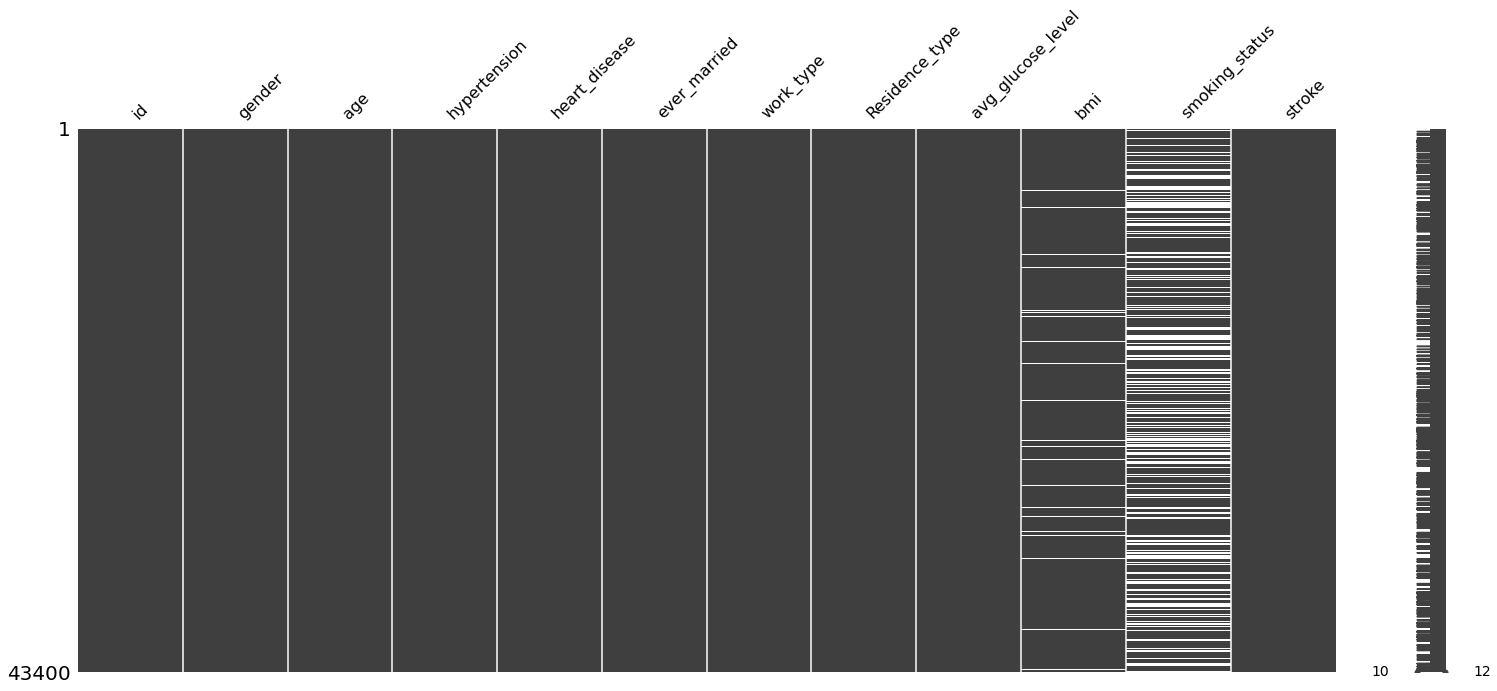

In [58]:
ms.matrix(train)

In [59]:
train_data=train.dropna(axis=0, how="any" )
test_data=test.dropna(axis=0, how="any" )
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}'.format(test_data.shape))


train data shape: (29072, 12)
test data shape: (12423, 11)


<AxesSubplot:>

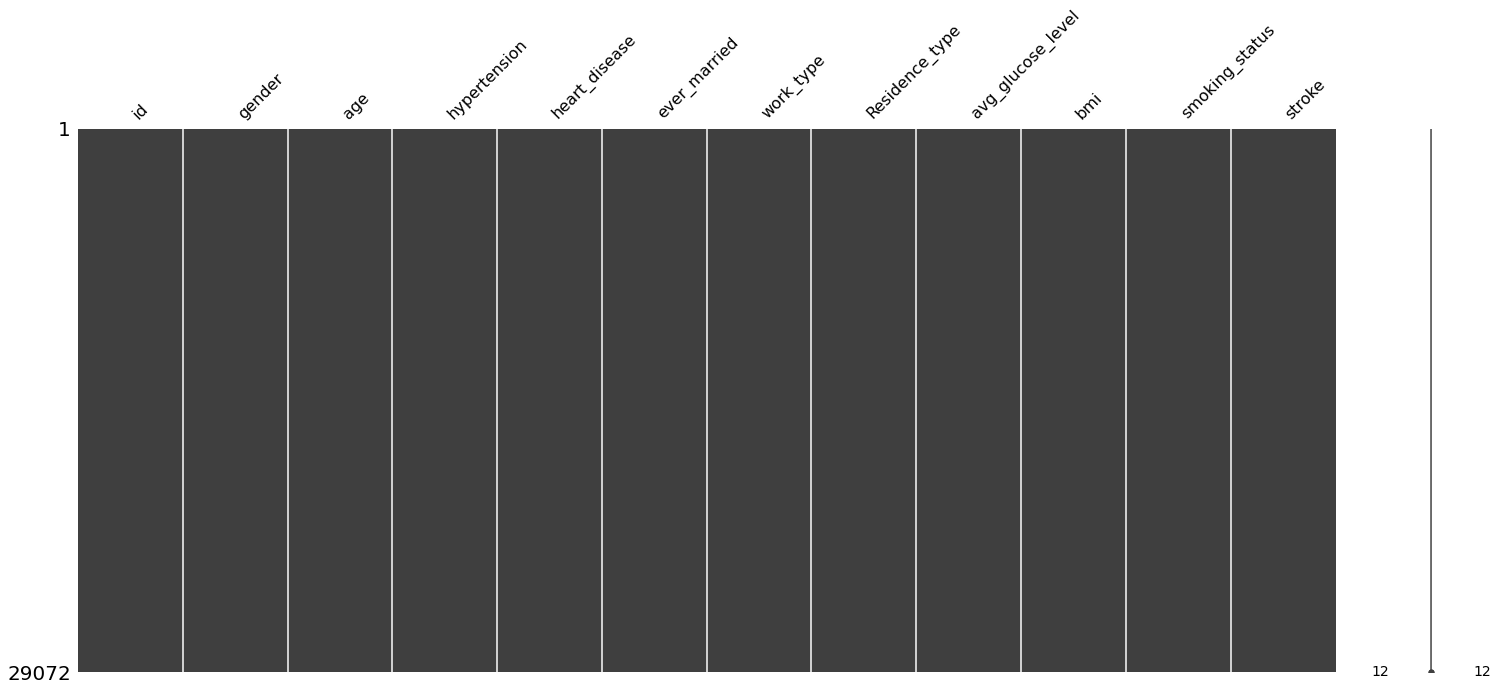

In [60]:
ms.matrix(train_data)

<AxesSubplot:>

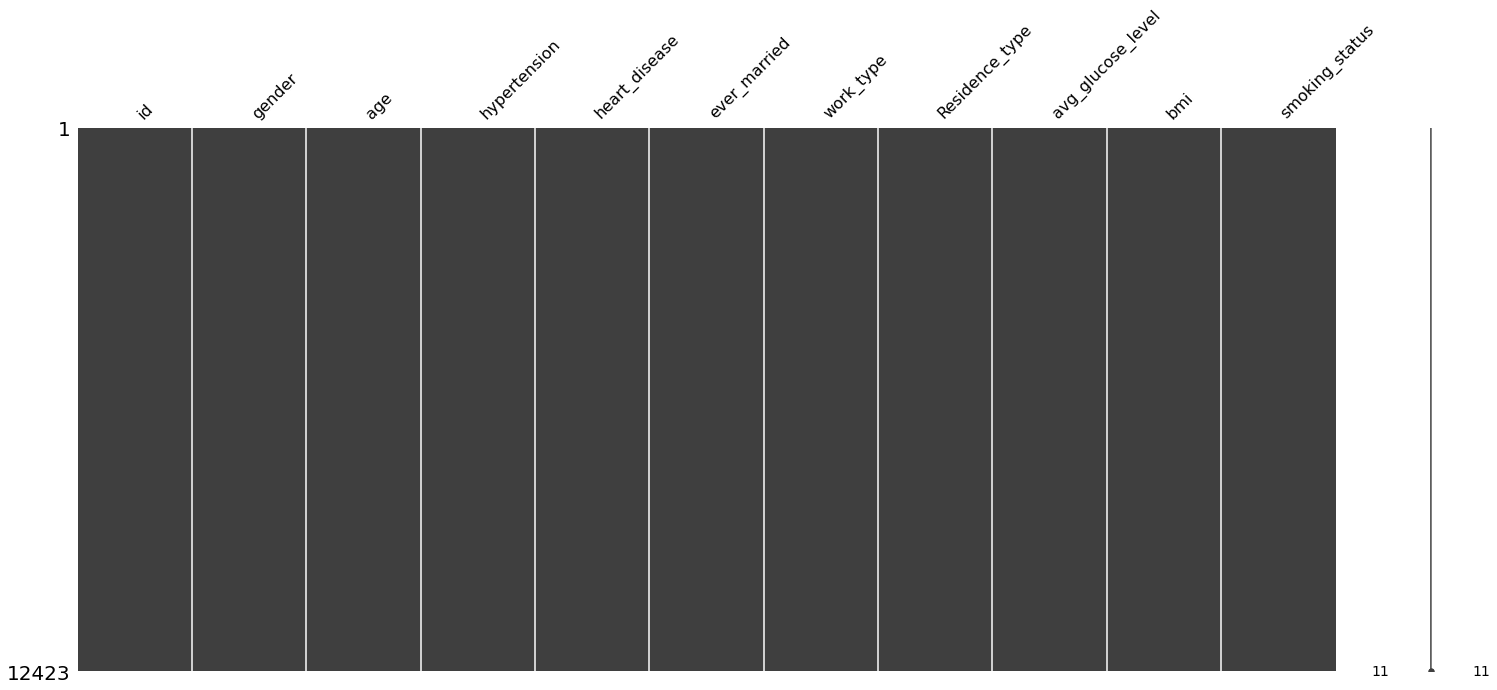

In [61]:
ms.matrix(test_data)

###  Pattern Recognition

In [63]:
train_data["stroke"].value_counts()


0    28524
1      548
Name: stroke, dtype: int64

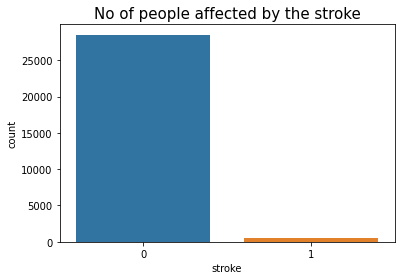

In [64]:
sns.countplot(x=train_data["stroke"])
plt.title("No of people affected by the stroke",fontsize=15)
plt.show()


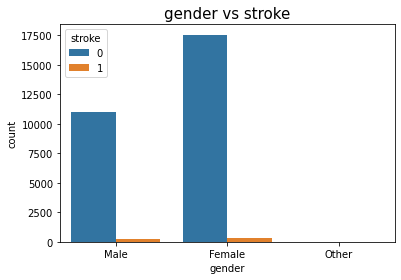

In [65]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [66]:
train_data.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [67]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [68]:

train_data.groupby(["gender"])["smoking_status"].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

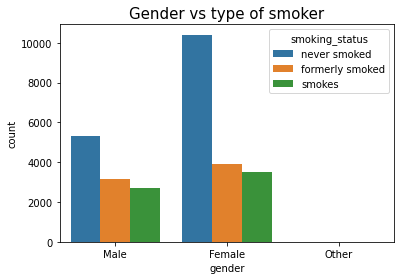

In [69]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("Gender vs type of smoker", fontsize=15 )
plt.show()

In [70]:
#con

In [71]:
str_data=train_data.select_dtypes(include=['object'])
str_dta=test_data.select_dtypes(include=['object'])

In [72]:
int_data=train_data.select_dtypes(include=['integer','float'])
int_dta=test_data.select_dtypes(include=['integer','float'])


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join( int_data)
features.head()


,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [75]:
test1=str_dta.apply(label.fit_transform)
Test=test1.join(int_dta)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


###  Modelling and predicting  the data

In [77]:
xtrain=features.drop(["stroke"],axis=1)
xtrain

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0,4,1,1,56196,10.0,0,0,58.64,20.4
43396,0,1,0,1,0,5450,56.0,0,0,213.61,55.4
43397,0,1,2,1,0,28375,82.0,1,0,91.94,28.9
43398,1,1,2,1,1,27973,40.0,0,0,99.16,33.2


In [78]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(29072,)

In [79]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [80]:
x_test.shape

(7268, 11)

In [81]:
y_test.shape

(7268,)

In [82]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
26511,0,0,2,1,2,29980,44.0,0,0,80.86,33.2
33380,0,1,2,0,1,60109,61.0,0,0,105.27,28.7
31187,1,0,3,0,1,13641,36.0,0,0,88.07,30.1
33944,0,1,2,0,1,58605,51.0,0,0,61.03,25.7
17715,1,0,3,1,0,29754,78.0,1,0,66.41,26.0


In [83]:
y_train.head()

26511    0
33380    0
31187    0
33944    0
17715    0
Name: stroke, dtype: int64

### NAIVE BAYES

In [85]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
24266,0,1,2,0,1,54964,53.0,0,0,198.13,38.3
40620,1,1,2,1,1,2648,47.0,0,0,68.36,34.1
9197,0,1,2,1,0,57547,62.0,0,0,132.44,25.5
39245,0,1,2,1,2,61596,39.0,0,0,109.66,21.4
14292,0,0,2,0,1,60081,42.0,0,0,110.53,27.7


In [86]:
y_test.head()

24266    0
40620    0
9197     0
39245    0
14292    0
Name: stroke, dtype: int64

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
Model=GaussianNB()
Model.fit(x_train,y_train)


GaussianNB()

In [92]:
predict=Model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
test_score=Model.score(x_test, y_test)
print("NBtest_score:", test_score)           

NBtest_score: 0.9764722069345074


### Confusion Matrix

In [94]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7089,54
1,117,8


### Report for  Naive Bayes

In [95]:
from sklearn.metrics import classification_report

In [96]:
nbreport=classification_report(y_test,predict)
nbreport

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      7143\n           1       0.13      0.06      0.09       125\n\n    accuracy                           0.98      7268\n   macro avg       0.56      0.53      0.54      7268\nweighted avg       0.97      0.98      0.97      7268\n'

### DECISION TREE

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
dt_predict=dt_model.predict(x_test)
dt_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
dt_testscore=dt_model.score(x_test,y_test)
print("DTtest_score :", dt_testscore)

DTtest_score : 0.9620253164556962


### Report for Decision Tree

In [104]:
DTreport=classification_report(y_test, predict)
DTreport

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      7143\n           1       0.13      0.06      0.09       125\n\n    accuracy                           0.98      7268\n   macro avg       0.56      0.53      0.54      7268\nweighted avg       0.97      0.98      0.97      7268\n'

### Confusion Matrix (Decision tree)

In [106]:
dt_conf_mtr=pd.crosstab(y_test, predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,7089,54
1,117,8


#### RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
rf_predict=rf_model.predict(x_test)
rf_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
rf_testscore=rf_model.score(x_test, y_test)
print("Random forest testscore:", rf_testscore)

Random forest testscore: 0.9828013208585581


### MLP (Multilayer perceptron)

In [112]:
from sklearn.neural_network import  MLPClassifier

In [113]:
mlp_model=MLPClassifier()
mlp_model.fit(x_train, y_train)

MLPClassifier()

In [114]:
mlp_predict=mlp_model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
mlp_model.score(x_test, y_test)

0.9828013208585581

### Cross Validating Accuracies

In [117]:
from  sklearn.model_selection   import  cross_val_score
cross_val_score(Model,x_train,y_train , cv=20 ,scoring='accuracy').mean()

0.9733075034267022

In [118]:
cross_val_score(dt_model,x_train,y_train , cv=20 ,scoring='accuracy').mean()

0.9586312111605378

In [119]:
cross_val_score(rf_model,x_train,y_train , cv=20 ,scoring='accuracy').mean()

0.9805999882272808

In [120]:
cross_val_score(mlp_model,x_train,y_train , cv=20 ,scoring='accuracy').mean()

0.9764289978893197

### PCA(Principle Component Analysis)

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [131]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB()

In [134]:
model_2_testscore=model_2.score(x_test, y_test)
print("PCA testscore of  naive bayes :", model_2_testscore)

PCA testscore of  naive bayes : 0.9756466703357182


In [135]:
dt_model2=DecisionTreeClassifier()
dt_model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [137]:
dt_model2_testscore=dt_model2.score(x_test, y_test)
print("AfterPCA testscore of desision tree:", dt_model2_testscore)

AfterPCA testscore of desision tree: 0.9572096862960925


In [138]:
rf_model2=RandomForestClassifier()
rf_model2.fit(x_train, y_train)

RandomForestClassifier()

In [152]:
rf_model2testscore=rf_model2.score(x_test, y_test)
print("After PCA testscore for random forest :",rf_model2testscore)

After PCA testscore for random forest : 0.9797743533296642


In [153]:
mlp_model2=MLPClassifier()
mlp_model2.fit(x_train, y_train)

MLPClassifier()

In [154]:
mlp_model2testscore=mlp_model2.score(x_test, y_test)
print("After PCA test score of mlp : ",mlp_model2testscore)

After PCA test score of mlp :  0.9412493120528344


### Cross validating Accuracies

In [155]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [156]:
cross_val_score(dt_model2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9591355361151003

In [157]:
cross_val_score(rf_model2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [151]:
cross_val_score(mlp_model2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.980771888735633